In [12]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

In [13]:
f = open("images/sino3.txt", 'r')
line = f.read()
print(line)
f.close

   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	  -0.0000000e+00	  -0.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+

<function TextIOWrapper.close()>

In [14]:
import numpy as np
metal3_img = np.zeros((256,360))
k = 0
l = 0
for i, j in enumerate(line):
    if j == '\t':
        metal3_img[k,l] = float(line[i-14:i])
        k = k+1
        if k == 256:
            k = 0
            l = l+1

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

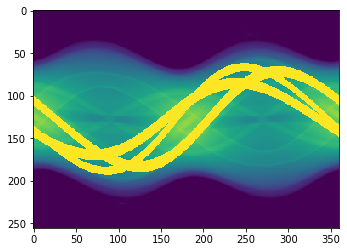

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

plt.imshow(metal3_img)
plt.colorbar

In [16]:
metal3_img.shape

(256, 360)

In [17]:
result_img = metal3_img
window_size = 3

k = 0
z = 0

for i in range(256-window_size-1):
    for j in range(100-window_size):
        if 0 in result_img[i:i+window_size+1,j:j+window_size]:
            z=0
        else:
            if 30 in result_img[i:i+window_size+1,j:j+window_size]:
                z = 0
            else:
                k = k+1
train_data = np.zeros((k,window_size,window_size,1))
result_data = np.zeros((k,1))

In [18]:
model = models.Sequential()
model.add(layers.Conv2D(32, (1, 1), activation='relu', input_shape=(3, 3, 1)))
model.add(layers.MaxPooling2D((1, 1)))
model.add(layers.Conv2D(64, (1, 1), activation='relu'))
model.add(layers.MaxPooling2D((1, 1)))
model.add(layers.Conv2D(64, (1, 1), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(300, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 3, 3, 32)          64        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 3, 64)          2112      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          4160      
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [19]:
k = 0

for i in range(256-window_size-1):
    for j in range(100-window_size):
        if 0 in result_img[i:i+1+window_size,j:j+window_size]:
            z=0
        else:
            if 300 in result_img[i:i+1+window_size,j:j+window_size]:
                z = 0
            else:
                for v in range(window_size):
                    for w in range(window_size):
                        train_data[k,w,v,0] = result_img[i+w,j+v]
                result_data[k,0] = int(result_img[i+window_size,j])
                k = k+1
print(train_data.shape)
print(result_data.shape)

model.fit(train_data, result_data, epochs=1000)

(19841, 3, 3, 1)
(19841, 1)
Epoch 1/1000
621/621 [==============================] - 1s 2ms/step - loss: 3.5256 - accuracy: 0.3791
Epoch 2/1000
621/621 [==============================] - 1s 2ms/step - loss: 3.0486 - accuracy: 0.4100
Epoch 3/1000
621/621 [==============================] - 1s 2ms/step - loss: 2.9620 - accuracy: 0.4108
Epoch 4/1000
621/621 [==============================] - 1s 2ms/step - loss: 2.8719 - accuracy: 0.4155
Epoch 5/1000
621/621 [==============================] - 1s 2ms/step - loss: 2.7740 - accuracy: 0.4154
Epoch 6/1000
621/621 [==============================] - 1s 2ms/step - loss: 2.6201 - accuracy: 0.4196
Epoch 7/1000
621/621 [==============================] - 1s 2ms/step - loss: 2.4426 - accuracy: 0.4234
Epoch 8/1000
621/621 [==============================] - 1s 2ms/step - loss: 2.3596 - accuracy: 0.4298
Epoch 9/1000
621/621 [==============================] - 1s 2ms/step - loss: 2.2469 - accuracy: 0.4345
Epoch 10/1000
621/621 [==============================]

621/621 [==============================] - 1s 2ms/step - loss: 1.4976 - accuracy: 0.5082
Epoch 160/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.4798 - accuracy: 0.5088
Epoch 161/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.4923 - accuracy: 0.5058
Epoch 162/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.5265 - accuracy: 0.5064
Epoch 163/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.4873 - accuracy: 0.5093
Epoch 164/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.4826 - accuracy: 0.5109
Epoch 165/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.4970 - accuracy: 0.5091
Epoch 166/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.4903 - accuracy: 0.5077
Epoch 167/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.4743 - accuracy: 0.5145
Epoch 168/1000
621/621 [==============================] - 1s 2ms/step - loss: 1

621/621 [==============================] - 1s 2ms/step - loss: 1.3782 - accuracy: 0.5287
Epoch 316/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.3714 - accuracy: 0.5291
Epoch 317/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.3794 - accuracy: 0.5273
Epoch 318/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.3764 - accuracy: 0.5313
Epoch 319/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.3705 - accuracy: 0.5308
Epoch 320/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.3705 - accuracy: 0.5288
Epoch 321/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.3761 - accuracy: 0.5263
Epoch 322/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.3717 - accuracy: 0.5334
Epoch 323/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.3800 - accuracy: 0.5269
Epoch 324/1000
621/621 [==============================] - 1s 2ms/step - loss: 1

621/621 [==============================] - 1s 2ms/step - loss: 1.3101 - accuracy: 0.5452
Epoch 472/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.3000 - accuracy: 0.5477
Epoch 473/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.3218 - accuracy: 0.5387
Epoch 474/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.3065 - accuracy: 0.5435
Epoch 475/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.3162 - accuracy: 0.5412
Epoch 476/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.3062 - accuracy: 0.5440
Epoch 477/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.3103 - accuracy: 0.5408
Epoch 478/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.3110 - accuracy: 0.5423
Epoch 479/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.3124 - accuracy: 0.5422
Epoch 480/1000
621/621 [==============================] - 1s 2ms/step - loss: 1

621/621 [==============================] - 1s 2ms/step - loss: 1.2735 - accuracy: 0.5526
Epoch 628/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.2750 - accuracy: 0.5516
Epoch 629/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.2761 - accuracy: 0.5486
Epoch 630/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.2767 - accuracy: 0.5517
Epoch 631/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.2963 - accuracy: 0.5461: 0s -
Epoch 632/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.2825 - accuracy: 0.5535
Epoch 633/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.2622 - accuracy: 0.5541
Epoch 634/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.2843 - accuracy: 0.5507
Epoch 635/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.2689 - accuracy: 0.5517
Epoch 636/1000
621/621 [==============================] - 1s 2ms/step - l

621/621 [==============================] - 1s 2ms/step - loss: 1.2413 - accuracy: 0.5586
Epoch 784/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.2435 - accuracy: 0.5544
Epoch 785/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.2454 - accuracy: 0.5570
Epoch 786/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.2342 - accuracy: 0.5591
Epoch 787/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.2366 - accuracy: 0.5595
Epoch 788/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.2468 - accuracy: 0.5580
Epoch 789/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.2391 - accuracy: 0.5596
Epoch 790/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.2470 - accuracy: 0.5574
Epoch 791/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.2281 - accuracy: 0.5617
Epoch 792/1000
621/621 [==============================] - 1s 2ms/step - loss: 1

621/621 [==============================] - 1s 2ms/step - loss: 1.2301 - accuracy: 0.5610
Epoch 940/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.2176 - accuracy: 0.5644
Epoch 941/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.2219 - accuracy: 0.5624
Epoch 942/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.2175 - accuracy: 0.5622
Epoch 943/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.2204 - accuracy: 0.5652
Epoch 944/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.2376 - accuracy: 0.5636
Epoch 945/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.2056 - accuracy: 0.5689
Epoch 946/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.2234 - accuracy: 0.5623
Epoch 947/1000
621/621 [==============================] - 1s 2ms/step - loss: 1.2139 - accuracy: 0.5643
Epoch 948/1000
621/621 [==============================] - 1s 2ms/step - loss: 1

In [20]:
for i in range(256-window_size-1):
    for j in range(100-window_size):
        if result_img[i+window_size,j] == 300:
            test_data = np.zeros((1,window_size,window_size,1))
            for v in range(window_size):
                for w in range(window_size):
                    test_data[0,w,v,0] = result_img[i+w,j+v]
            prediction = model.predict(test_data)
            result_img[i+window_size,j] = np.where(prediction[0]==max(prediction[0]))[0][0]
            print(np.where(prediction[0]==max(prediction[0]))[0][0])

217
217
223
223
223
231
231
231
231
240
240
236
231
231
245
245
240
231
231
231
229
245
245
242
231
231
231
231
231
245
245
242
231
231
231
231
231
231
245
245
240
231
231
231
231
231
231
231
245
245
236
231
231
231
231
231
231
231
231
245
245
231
231
231
231
231
231
231
231
231
236
231
242
242
231
231
231
231
231
231
231
236
231
236
231
231
240
231
231
231
231
231
236
231
242
231
236
231
231
231
231
231
231
236
231
245
231
245
231
236
231
231
231
231
231
245
231
245
231
245
231
236
231
231
231
231
236
245
231
245
231
245
231
236
231
231
236
231
240
231
231
231
245
231
245
231
236
236
231
245
231
242
231
231
227
231
245
236
236
245
231
245
231
242
231
231
229
223
245
245
236
245
231
245
231
240
231
231
231
223
217
245
236
245
231
245
231
236
231
231
231
223
217
223
236
245
231
245
231
231
231
231
231
223
217
229
223
245
231
242
231
231
231
231
231
227
217
231
223
217
212
236
231
231
231
231
231
231
217
231
217
212
212
212
231
231
231
231
231
231
217
223
212
212
212
212
212
231
231
231


39
243
206
248
37
150
150
150
150
150
150
150
157
251
243
243
139
85
57
52
46
46
46
54
26
20
21
32
40
41
141
54
43
37
85
240
79
37
37
24
29
33
36
1
1
1
163
41
50
38
39
249
231
207
39
4
16
45
41
37
140
67
43
37
85
223
108
37
37
28
46
1
41
219
189
50
38
37
41
248
248
227
37
39
185
49
40
41
139
82
43
37
86
217
129
37
37
248
250
39
249
243
51
32
37
39
245
248
245
41
37
251
41
224
139
41
129
54
43
37
91
223
138
37
37
39
249
249
52
30
37
37
245
231
249
37
37
248
34
248
139
150
150
132
67
43
37
45
231
138
37
37
248
248
50
47
37
37
245
227
249
37
37
245
41
248
147
150
150
150
150
150
33
37
41
240
138
37
37
79
151
37
37
245
223
248
37
43
245
41
248
150
150
150
150
150
150
150
148
147
41
243
138
37
37
37
37
245
217
248
37
56
245
41
248
150
150
150
150
150
150
150
148
147
147
147
140
140
146
138
37
37
245
217
248
37
82
245
41
248
150
150
150
150
150
150
150
148
148
147
140
139
139
147
140
147
147
147
148
250
40
41
85
138
37
37
217
248
37
87
245
41
248
150
150
150
150
150
150
150
148
140
139
139
1

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

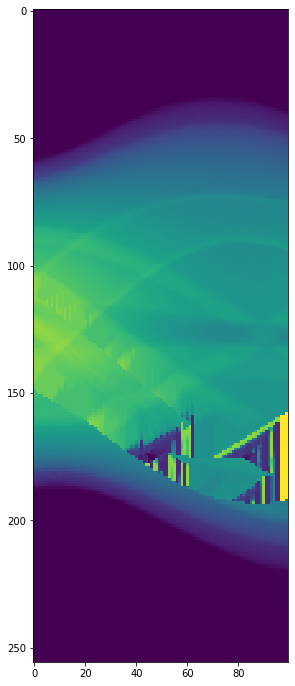

In [21]:
plt.figure(figsize=(8,12))
plt.imshow(result_img[:,0:100])
plt.colorbar

In [ ]:
plt.imshow(result_img)
plt.colorbar
plt.axis('off'), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.subplots_adjust(left = 0, bottom = 0, right = 1, top = 1, hspace = 0, wspace = 0)
plt.savefig('images/RCNN3(100).png', bbox_inches = 'tight', pad_inches=0, dpi=100)

In [207]:
# np.savetxt('images/CNN_Metal3_3by3_txt.txt', result_img)